In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('calories_dataset.csv').drop(columns='Unnamed: 0')
df_copy = df.copy()
df_copy.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
df_copy.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [5]:
df_copy.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

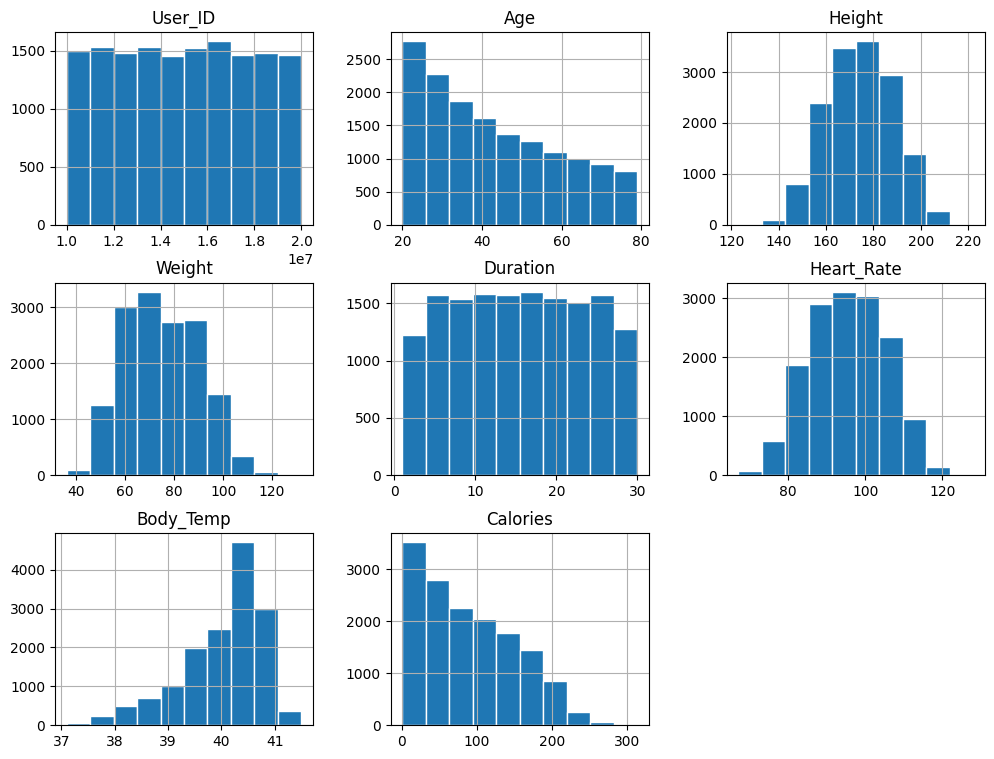

In [6]:
df_copy.hist(figsize=(12, 9), edgecolor='white')
plt.show()

In [7]:
df_copy.corr(numeric_only=True)

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [8]:
df_copy['Duration_cat'] = pd.cut(df_copy['Duration'],
                                 bins=[0, 10, 20, 30],
                                 labels=['0-10', '10-20', '20-30'])

df_copy['Heart_Rate_cat'] = pd.cut(df['Heart_Rate'],
                              bins=[65, 75, 85, 95, 105, 115, 125, 135],
                              labels=['65-75', '75-85', '85-95', '95-105', '105-115', '115-125', '125-135'])

row_to_merge = df_copy[df_copy['Heart_Rate_cat'] == '125-135']
df_copy.loc[row_to_merge.index, 'Heart_Rate_cat'] = '115-125'

df_copy

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Duration_cat,Heart_Rate_cat
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,20-30,95-105
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,10-20,85-95
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,0-10,85-95
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,10-20,95-105
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,0-10,75-85
...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,10-20,85-95
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,0-10,75-85
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,10-20,85-95
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,0-10,75-85


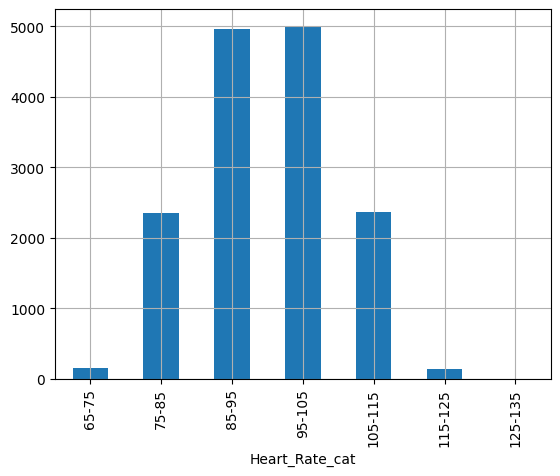

In [9]:
df_copy['Heart_Rate_cat'].value_counts().sort_index().plot.bar()
plt.grid()
plt.show()

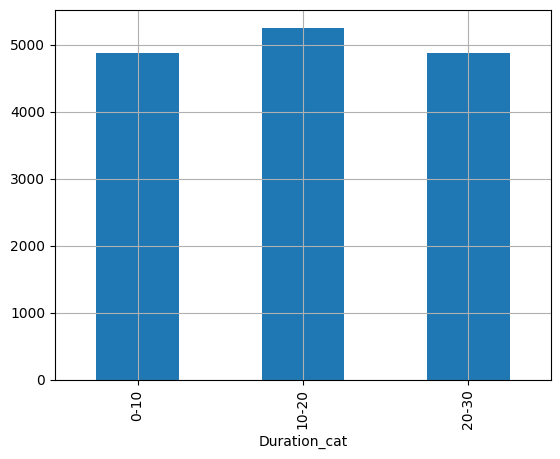

In [10]:
df_copy['Duration_cat'].value_counts().sort_index().plot.bar()
plt.grid()
plt.show()

#### Create the Test Set

In [11]:
df_copy.drop(columns='User_ID', inplace=True)

In [85]:
strat_train, strat_test = train_test_split(df_copy, test_size=.15, 
                                                    stratify=df_copy['Heart_Rate_cat'],
                                                    random_state=42)

In [86]:
for set_ in (strat_train, strat_test):
    set_.drop(columns=['Duration_cat', 'Heart_Rate_cat'], inplace=True)

In [87]:
strat_train_feats = strat_train.drop(columns='Calories')
strat_train_labels = strat_train['Calories'].copy()

#### Feature Engineering

In [148]:
def calc_BMI(df):
    df['BMI'] = df['Weight'] / (df['Height']/100)**2
    return df

def BMI_cat(df):
    df['BMI_cat'] = pd.cut(df['BMI'],
                                      bins=[0, 18.5, 25, 30, 35, 40, np.inf],
                                      labels=['Underweight', 'Normal', 'Overweight', 'Obesity_Class_I', 
                                              'Obesity_Class_II', 'Obesity_Class_III'])
    return df
    
def calc_work_load(df):
    df['Workload'] = df['Heart_Rate'] * df['Duration']
    return df


In [149]:
strat_train_feats = calc_BMI(strat_train_feats)
strat_train_feats = BMI_cat(strat_train_feats)
strat_train_feats = calc_work_load(strat_train_feats)

In [150]:
strat_train_feats

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,BMI_cat,Workload
4743,female,23,170.0,63.0,15.0,99.0,40.3,21.799308,Normal,1485.0
9656,male,46,189.0,98.0,14.0,100.0,40.3,27.434842,Overweight,1400.0
12198,female,22,169.0,62.0,19.0,99.0,40.3,21.707923,Normal,1881.0
12726,female,51,167.0,63.0,26.0,112.0,41.0,22.589551,Normal,2912.0
10229,female,43,153.0,55.0,14.0,98.0,40.1,23.495237,Normal,1372.0
...,...,...,...,...,...,...,...,...,...,...
6834,female,58,175.0,74.0,8.0,80.0,39.8,24.163265,Normal,640.0
4291,female,64,186.0,85.0,26.0,106.0,40.9,24.569314,Normal,2756.0
3270,male,35,184.0,85.0,15.0,93.0,40.0,25.106333,Overweight,1395.0
11041,female,34,181.0,73.0,18.0,101.0,40.1,22.282592,Normal,1818.0


#### Handling Categorical Attributes

In [151]:
def split_cat_num(df):
    feats_cat = df.select_dtypes(exclude=np.number)
    feats_num = df.select_dtypes(include=np.number)
    return feats_num, feats_cat

def one_hot_encode(df):
    ohe = OneHotEncoder()
    encode_1h = ohe.fit_transform(df)
    ohe_feature_names_out = ohe.get_feature_names_out()
    return encode_1h, ohe_feature_names_out

In [152]:
feats_num, feat_cat = split_cat_num(strat_train_feats)
feat_cat_encoded, ohe_feature_names_out = one_hot_encode(feat_cat)
feat_cat_encoded_df = pd.DataFrame(feat_cat_encoded.toarray(), columns=ohe_feature_names_out)
feat_cat_encoded_df

,Gender_female,Gender_male,BMI_cat_Normal,BMI_cat_Overweight
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
12745,1.0,0.0,1.0,0.0
12746,1.0,0.0,1.0,0.0
12747,0.0,1.0,0.0,1.0
12748,1.0,0.0,1.0,0.0


#### Feature Scaling and Transformation

In [153]:
def log_transform(col):
    log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
    log_col = log_transformer.fit_transform(col)
    return log_col

def minmaxscale(df):
    minmaxscaler = MinMaxScaler()
    scaled = minmaxscaler.fit_transform(df)
    return scaled

def concat(df1, df2):
    return pd.concat([df1, df2], axis=1)

In [154]:
log_age = log_transform(feats_num['Age'])
feats_num['Age'] = log_age
feats_num_sc = minmaxscale(feats_num)
feats_num_sc_df = pd.DataFrame(feats_num_sc, columns=feats_num.columns)

In [155]:
strat_train_feats_final = concat(feats_num_sc_df, feat_cat_encoded_df)
strat_train_feats_final

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Workload,Gender_female,Gender_male,BMI_cat_Normal,BMI_cat_Overweight
0,0.101740,0.474747,0.281250,0.482759,0.524590,0.720930,0.262474,0.375828,1.0,0.0,1.0,0.0
1,0.606318,0.666667,0.645833,0.448276,0.540984,0.720930,0.837668,0.353300,0.0,1.0,0.0,1.0
2,0.069381,0.464646,0.270833,0.620690,0.524590,0.720930,0.253147,0.480785,1.0,0.0,1.0,0.0
3,0.681432,0.444444,0.281250,0.862069,0.737705,0.883721,0.343131,0.754042,1.0,0.0,1.0,0.0
4,0.557224,0.303030,0.197917,0.448276,0.508197,0.674419,0.435570,0.345879,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12745,0.775059,0.525253,0.395833,0.241379,0.213115,0.604651,0.503753,0.151869,1.0,0.0,1.0,0.0
12746,0.846719,0.636364,0.510417,0.862069,0.639344,0.860465,0.545196,0.712695,1.0,0.0,1.0,0.0
12747,0.407374,0.616162,0.510417,0.482759,0.426230,0.651163,0.600007,0.351975,0.0,1.0,0.0,1.0
12748,0.386272,0.585859,0.385417,0.586207,0.557377,0.674419,0.311801,0.464087,1.0,0.0,1.0,0.0


#### Train the Model

In [156]:
lin_reg = LinearRegression()

In [157]:
lin_reg.fit(strat_train_feats_final, strat_train_labels)

LinearRegression()

In [158]:
lin_reg.score(strat_train_feats_final, strat_train_labels)

0.9840458727754856

In [159]:
cv = cross_val_score(lin_reg, strat_train_feats_final, strat_train_labels, cv=20)
cv

array([0.98527148, 0.98338439, 0.98356526, 0.98237936, 0.98557574,
       0.98480608, 0.98112886, 0.98329288, 0.9844498 , 0.98332224,
       0.98455132, 0.98424673, 0.98266979, 0.98464626, 0.98580196,
       0.98513348, 0.98381046, 0.9833976 , 0.98383249, 0.98445983])

In [160]:
pd.DataFrame(cv).describe()

,0
count,20.000000
mean,0.983986
std,0.001149
min,0.981129
25%,0.983369
50%,0.984040
75%,0.984686
max,0.985802


In [161]:
predictions = lin_reg.predict(strat_train_feats_final)

In [162]:
rmse = mean_squared_error(strat_train_labels, predictions, squared=False)
rmse

7.8812580733771895

In [168]:
rmses = -cross_val_score(lin_reg, strat_train_feats_final, strat_train_labels, cv=10,
                     scoring='neg_mean_squared_error')
rmses

array([57.83384462, 66.37283021, 56.50093666, 73.69214331, 65.05897702,
       61.37686802, 62.01531275, 57.13012944, 62.80517002, 60.16091494])

In [169]:
pd.DataFrame(rmses).describe()

,0
count,10.000000
mean,62.294713
std,5.164493
min,56.500937
25%,58.415612
50%,61.696090
75%,64.495525
max,73.692143


In [165]:
rf = RandomForestRegressor(random_state=42)

In [166]:
rf.fit(strat_train_feats_final, strat_train_labels)

RandomForestRegressor(random_state=42)

In [167]:
rf_rmses = -cross_val_score(rf, strat_train_feats_final, strat_train_labels, cv=10,
                     scoring='neg_mean_squared_error')
rf_rmses

array([6.87236439, 7.24856008, 6.86838204, 9.07474737, 7.68444769,
       7.5287298 , 7.83444596, 8.7535502 , 6.97749875, 8.199796  ])

In [170]:
pd.DataFrame(rf_rmses).describe()

,0
count,10.000000
mean,7.704252
std,0.774564
min,6.868382
25%,7.045264
50%,7.606589
75%,8.108458
max,9.074747


In [171]:
rf.score(strat_train_feats_final, strat_train_labels)

0.9997360860731624

In [179]:
dt_reg = DecisionTreeRegressor(random_state=42)

In [180]:
dt_reg.fit(strat_train_feats_final, strat_train_labels)

DecisionTreeRegressor(random_state=42)

In [181]:
dt_reg_rmses = -cross_val_score(dt_reg, strat_train_feats_final, strat_train_labels, cv=10,
                     scoring='neg_mean_squared_error')
dt_reg_rmses

array([21.47686275, 26.76078431, 21.55764706, 23.24313725, 21.16078431,
       22.76784314, 21.94431373, 23.25882353, 23.28235294, 19.53647059])

In [183]:
pd.DataFrame(dt_reg_rmses).describe()

,0
count,10.000000
mean,22.498902
std,1.908629
min,19.536471
25%,21.497059
50%,22.356078
75%,23.254902
max,26.760784


#### Evaluate the Model

In [173]:
strat_test_feats = strat_test.drop(columns='Calories')
strat_test_labels = strat_test['Calories'].copy()

In [184]:
strat_test_feats = calc_BMI(strat_test_feats)
strat_test_feats = BMI_cat(strat_test_feats)
strat_test_feats = calc_work_load(strat_test_feats)
test_feats_num, test_feat_cat = split_cat_num(strat_test_feats)
test_feat_cat_encoded, test_ohe_feature_names_out = one_hot_encode(test_feat_cat)
test_feat_cat_encoded_df = pd.DataFrame(test_feat_cat_encoded.toarray(), columns=test_ohe_feature_names_out)
test_log_age = log_transform(test_feats_num['Age'])
test_feats_num['Age'] = test_log_age
test_feats_num_sc = minmaxscale(test_feats_num)
test_feats_num_sc_df = pd.DataFrame(test_feats_num_sc, columns=test_feats_num.columns)
strat_test_feats_final = concat(test_feats_num_sc_df, test_feat_cat_encoded_df)

In [186]:
final_predictions = rf.predict(strat_test_feats_final)
final_predictions

array([127.13, 159.49, 101.8 , ..., 223.43, 152.95,  40.12])

In [188]:
final_rmse = mean_squared_error(strat_test_labels, final_predictions, squared=False)
final_rmse

13.330463596172823

In [194]:
final_score = rf.score(strat_test_feats_final, strat_test_labels)
final_score

0.9549141332711137